In [22]:
#爬天气源码
from selenium import webdriver
from bs4 import BeautifulSoup
import time

driver = webdriver.Chrome()
url = 'http://www.tianqi234.com/qingdao12yuetianqi'
xpath = '/html/body/div[4]/div[2]/div[1]/div[4]/div/table'
driver.get(url)
time.sleep(4)
table1 = driver.find_element_by_xpath(xpath).get_attribute("innerHTML")

soup = BeautifulSoup(table1,'html.parser')
table = soup.find_all('tr')
for row in table:
    cols = [col.text for col in row.find_all('td')]
    print(cols)
driver.close()

['2020年青岛12月上旬天气']
['日期', '最高气温', '最底气温', '白天天气', '夜间天气', '风向', '风力']
['12月1日', '5 ℃', '3 ℃', '小雨', '雨夹雪', '北风', '']
['12月2日', '6 ℃', '2 ℃', '阴', '多云', '北风', '']
['12月3日', '5 ℃', '0 ℃', '多云', '晴', '北风', '']
['12月4日', '5 ℃', '0 ℃', '晴', '晴', '北风', '']
['12月5日', '6 ℃', '2 ℃', '晴', '多云', '北风', '']
['12月6日', '8 ℃', '3 ℃', '多云', '多云', '西南风', '']
['12月7日', '8 ℃', '-2 ℃', '多云', '多云', '北风', '']
['12月8日', '3 ℃', '-1 ℃', '晴', '多云', '北风', '']
['12月9日', '8 ℃', '3 ℃', '多云', '多云', '西南风', '']
['12月10日', '8 ℃', '3 ℃', '晴', '多云', '南风', '']
['2020年青岛12月中旬天气']
['日期', '最高气温', '最底气温', '白天天气', '夜间天气', '风向', '风力']
['12月11日', '8 ℃', '3 ℃', '多云', '多云', '北风', '']
['12月12日', '9 ℃', '3 ℃', '多云', '多云', '南风', '']
['12月13日', '3 ℃', '-4 ℃', '多云', '多云', '北风', '']
['12月14日', '0 ℃', '-4 ℃', '多云', '晴', '北风', '']
['12月15日', '2 ℃', '-4 ℃', '晴', '晴', '北风', '']
['12月16日', '3 ℃', '-3 ℃', '晴', '晴', '北风', '']
['12月17日', '5 ℃', '0 ℃', '晴', '多云', '西南风', '']
['12月18日', '4 ℃', '-3 ℃', '多云', '晴', '北风', '']
['12月19日', '2 ℃', '-2 ℃', 

In [36]:
#爬天气
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

driver = webdriver.Chrome()
url = 'http://www.tianqi234.com/qingdao12yuetianqi'
xpath = '/html/body/div[4]/div[2]/div[1]/div[4]/div/table'
driver.get(url)
time.sleep(4)
table1 = driver.find_element_by_xpath(xpath).get_attribute("innerHTML")

soup = BeautifulSoup(table1,'html.parser')
table = soup.find_all('tr')
driver.close()

['12月1日', '12月2日', '12月3日', '12月4日', '12月5日', '12月6日', '12月7日', '12月8日', '12月9日', '12月10日', '12月11日', '12月12日', '12月13日', '12月14日', '12月15日', '12月16日', '12月17日', '12月18日', '12月19日', '12月20日', '12月21日', '12月22日', '12月23日', '12月24日', '12月25日', '12月26日', '12月27日', '12月28日', '12月29日', '12月30日', '12月31日']
['5', '6', '5', '5', '6', '8', '8', '3', '8', '8', '8', '9', '3', '0', '2', '3', '5', '4', '2', '5', '5', '8', '9', '6', '6', '9', '9', '7', '1', '5', '2']
['3', '2', '0', '0', '2', '3', '2', '1', '3', '3', '3', '3', '4', '4', '4', '3', '0', '3', '2', '1', '0', '3', '1', '1', '1', '4', '2', '1', '7', '8', '6']


In [79]:
#数据处理
high_lst = []
date_lst = []
low_lst = []

for row in table:
    cols = [col.text for col in row.find_all('td')]
    if len(cols)>=3 and cols[0]!='日期':
        date_lst.append(cols[0])
        high_lst.append(int(cols[1].replace(' ℃','')))
        low_lst.append(int(cols[2].replace(' ℃','')))

print(date_lst)
print(high_lst)
print(low_lst)


['12月1日', '12月2日', '12月3日', '12月4日', '12月5日', '12月6日', '12月7日', '12月8日', '12月9日', '12月10日', '12月11日', '12月12日', '12月13日', '12月14日', '12月15日', '12月16日', '12月17日', '12月18日', '12月19日', '12月20日', '12月21日', '12月22日', '12月23日', '12月24日', '12月25日', '12月26日', '12月27日', '12月28日', '12月29日', '12月30日', '12月31日']
[5, 6, 5, 5, 6, 8, 8, 3, 8, 8, 8, 9, 3, 0, 2, 3, 5, 4, 2, 5, 5, 8, 9, 6, 6, 9, 9, 7, -1, -5, -2]
[3, 2, 0, 0, 2, 3, -2, -1, 3, 3, 3, 3, -4, -4, -4, -3, 0, -3, -2, -1, 0, 3, -1, -1, 1, 4, 2, -1, -7, -8, -6]


In [80]:
#缩减数据
date=[]
high=[]
low=[]
dif=[]
for i in range(0,len(date_lst)):
    if i%5==0:
        date.append(date_lst[i])
        high.append(high_lst[i])
        low.append(low_lst[i])
        dif.append(int(high_lst[i])-int(low_lst[i]))

print(date)
print(high)
print(low)
print(dif)

['12月1日', '12月6日', '12月11日', '12月16日', '12月21日', '12月26日', '12月31日']
[5, 8, 8, 3, 5, 9, -2]
[3, 3, 3, -3, 0, 4, -6]
[2, 5, 5, 6, 5, 5, 4]


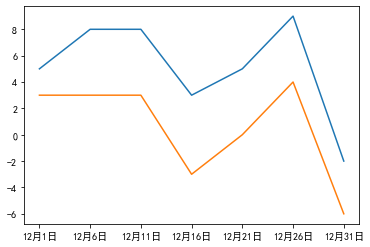

In [98]:
#折线图1
%matplotlib  inline
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False #解决纵坐标负号问题
plt.plot(date,high)
plt.plot(date,low)
plt.show()

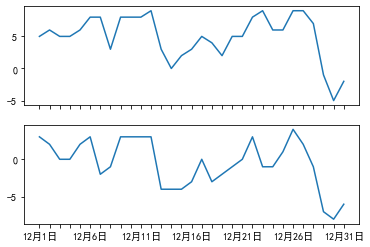

In [88]:
#折线图2
import matplotlib
plt.rcParams['axes.unicode_minus'] = False #解决纵坐标负号问题

matplotlib.rcParams['font.sans-serif']='SimHei'
%matplotlib  inline
import matplotlib.pyplot as plt
fig,ax = plt.subplots(2,1,sharex=True)
ax[0].plot(date_lst,high_lst)
ax[1].plot(date_lst,low_lst)
for i,label in enumerate(ax[1].get_xticklabels()):
    label.set_visible(i%5==0)
plt.show()

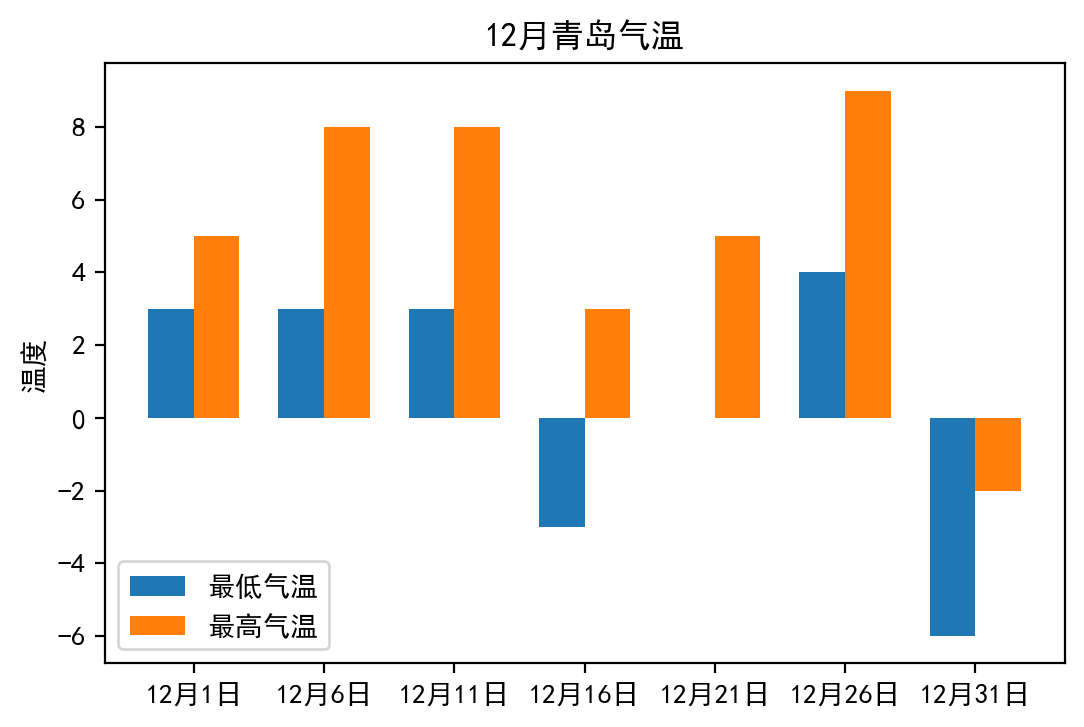

In [87]:
#多列条形图
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['axes.unicode_minus'] = False #解决纵坐标负号问题

fig = plt.figure(figsize=(6,5),dpi=200)
ax = fig.add_axes([0.1,0.3,0.8,0.6])

width = 0.35
ticks = np.arange(len(date))
ax.bar(ticks,low,width,label='最低气温')
ax.bar(ticks + width,high,width,align='center',label='最高气温')

ax.set_ylabel('温度')
ax.set_title('12月青岛气温')
ax.set_xticks(ticks + width/2)
ax.set_xticklabels(date)
ax.legend(loc='best')
plt.show()

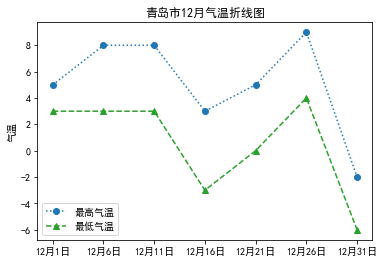

In [109]:
#折线图1(美化版)
%matplotlib  inline
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False #解决纵坐标负号问题
plt.plot(date,high,c='tab:blue',ls=':',marker='o',label='最高气温')
plt.plot(date,low,c='tab:green',ls='--',marker='^',label='最低气温')
plt.legend()
plt.title('青岛市12月气温折线图')
plt.ylabel('气温')
plt.show()